In [27]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
c = np.inner(a, b)
d = np.inner(b, a)

print( " a = ", a )
print( " b = ", b )
print( " c = ", c )
print( " d = ", d )

print( np.arctan2(3, 3)/math.pi )

 a =  [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
 b =  [0 1 2 3]
 c =  [[ 14  38  62]
 [ 86 110 134]]
 d =  [[ 14  38  62]
 [ 86 110 134]]
0.25


img shape=  (3, 3)
K = 3, H = 8, W = 8, r = 5.656854249492381
x =  [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 6 6 6 7 7 7 7
 7 7 8 8 8 8 8 8]
y =  [0 1 2 6 7 8 0 1 2 6 7 8 0 1 2 6 7 8 3 4 5 3 4 5 3 4 5 3 4 5 6 7 8 3 4 5 6
 7 8 3 4 5 6 7 8]

************************************************************

p = 6, q=2, (p - |q|)/2 = 2.0
s =  [0. 1. 2.]
R_ps =  [ 15. -20.   6.]
rho_power shape =  (3, 45)
rho_power.T shape =  (45, 3)
rho_power =  [[1.00000000e+00 4.76837158e-01 2.44140625e-01 2.44140625e-01
  4.76837158e-01 1.00000000e+00 4.76837158e-01 1.77978516e-01
  6.70471191e-02 6.70471191e-02 1.77978516e-01 4.76837158e-01
  2.44140625e-01 6.70471191e-02 1.56250000e-02 1.56250000e-02
  6.70471191e-02 2.44140625e-01 2.44140625e-04 3.05175781e-05
  2.44140625e-04 3.05175781e-05 0.00000000e+00 3.05175781e-05
  2.44140625e-04 3.05175781e-05 2.44140625e-04 3.81469727e-03
  1.95312500e-03 3.81469727e-03 1.56250000e-02 6.70471191e-02
  2.44140625e-01 3.05175781e-02 2.22473145e

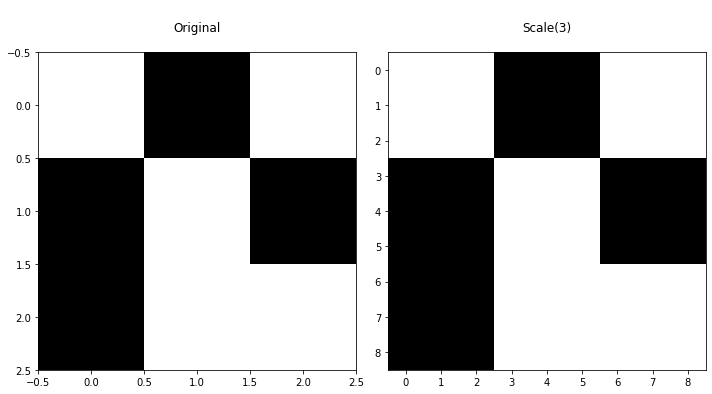

In [33]:
import numpy as np, cv2 as cv, math
from scipy.special import factorial
from matplotlib import pyplot as plt

line = "*"*60
line2 = "\n" + "*"*60 + "\n"

def Rpq(p, q, rho) :
    q = abs( q )
    
    if int(p - q)%2 == 1 : 
        print( f"Invalid argument, p({p}) - q({q}) should be an even number.")
        return 
    pass 

    t = max( (p - q)/2, 0 )
    s = np.arange( 0, t + 1 )
    
    R_ps = np.power( -1, s )*factorial(p - s)/factorial(s)/factorial( (p + q)/2 - s)/factorial( (p - q)/2 - s )
    rho_power = []
    
    for p_2s in p - 2*s :
        rho_power.append( np.power(rho, p_2s ) )
    pass

    rho_power = np.array( rho_power )
    
    R_pq_rho = np.inner( rho_power.T, R_ps )
    
    R_sum = np.sum( R_pq_rho )
        
    print( line2 )
    print( f"p = {p}, q={q}, (p - |q|)/2 = {t}" )
    print( "s = ", s )
    print( "R_ps = ", R_ps )
    print( "rho_power shape = ", rho_power.shape )
    print( "rho_power.T shape = ", rho_power.T.shape )
    print( "rho_power = ", rho_power )
    print( "rho_power.T = ", rho_power.T )
    print( "R_pq_rho = ", R_pq_rho )    
    print( "R_sum = ", R_sum )
    print( line2 )
    
    return rho
pass

def Vpq( p, q, x, y ) :
    rho = np.sqrt( x**2 + y**2 )
    
    R_pq = Rpq( p, q, rho )
    
    V_pq = R_pq 
    
    if q : 
        V_pq = R_pq*np.exp( 1j*q*np.arctan2( y, x ) );
    pass    
    
    #print( "rho = ", rho )
    print( f"V_pq({p}, {q}) = ", V_pq )

    return V_pq
pass

img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 100
if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

img = np.array( [ [1, 0, 1], [0, 1, 0 ], [0, 1, 1] ], np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

k = 3
img = cv.resize( img_org, (img_org.shape[1]*k, img_org.shape[0]*k), interpolation=cv.INTER_AREA )

h = img.shape[0] - 1
w = img.shape[1] - 1
mwh = max( h/2, w/2 )
r = math.sqrt( 2*mwh*mwh )
print( f"K = {k}, H = {h}, W = {w}, r = {r}" )
x, y = np.where( img > 0 )

if 1 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

x = (x - mwh)/r
y = (y - mwh)/r

if 0 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

T = 10
print( f"T = {T}" )
for p in range( 0, T ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( 6, 2, x, y )
            test = np.sum( v_pq*np.conjugate(v_pq) )
            print( f"V_pq({p}, {q}) = ", v_pq )
        pass
    pass
pass

# 서브 챠트 생성 
idx = 0 
fig, charts = plt.subplots( 1, 2, figsize=(10, 10) )
charts = charts.flatten()
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( img_org, cmap='gray' )

chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({k})\n" )
chart.imshow( img, cmap='gray' )

plt.tight_layout(); plt.show()